Dans un modèle de classification binaire, comme celui que nous utilisons pour détecter la pneumonie à partir de radiographies pulmonaires, la sortie du modèle correspond à une probabilité indiquant si une image appartient à la classe PNEUMONIA.

Par défaut, le modèle utilise un seuil de 0.5 pour transformer cette probabilité en prédiction :

    Si la probabilité ≥ 0.5 : l'image est classée comme PNEUMONIA

    Si la probabilité < 0.5 : l'image est classée comme NORMAL

Le seuil de 0.5 n’est pas toujours optimal. En ajustant ce seuil, on peut faire varier l’équilibre entre la précision et le rappel :

    Un seuil plus bas favorise la détection des cas de pneumonie (rappel élevé), mais augmente le risque de fausses alertes.

    Un seuil plus élevé favorise la certitude dans les cas positifs (précision élevée), mais risque de manquer des cas réels.

Dans un contexte médical, il est important d’adapter le seuil selon les risques associés aux faux positifs ou faux négatifs.


Dans ce notebook, nous avons :

    Chargé les probabilités prédites par notre modèle sur l’ensemble de test, ainsi que les vraies étiquettes.

    Calculé les métriques (précision, rappel, F1-score) pour plusieurs seuils allant de 0.1 à 0.9.

    Stocké les résultats dans un DataFrame pour les analyser.

    Visualisé l’évolution des métriques en fonction du seuil à l’aide d’un graphique. Ce graphique montre comment chaque métrique varie en fonction du seuil.



In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Adnane\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from pathlib import Path


In [7]:
data_dir = Path("C:/WorkBench/Data/Projet/ZOIDBERG2.0/Travail/Data")
test_dir = data_dir / "test"
img_size = (224, 224)
batch_size = 32
seed = 42


In [8]:
model = load_model("models/densenet_model.keras", compile=False)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    label_mode='binary'
).prefetch(buffer_size=tf.data.AUTOTUNE)


Found 1050 files belonging to 2 classes.


In [9]:
y_true = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)
y_prob = model.predict(test_dataset).ravel()


33/33 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step


In [10]:
thresholds = np.arange(0.3, 0.61, 0.05)
results = []

for thresh in thresholds:
    y_pred = (y_prob >= thresh).astype(int)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    results.append({
        'threshold': thresh,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

df_results = pd.DataFrame(results)


In [11]:
print(df_results)


   threshold  precision    recall  f1_score
0       0.30   0.919708  0.960000  0.939422
1       0.35   0.945386  0.956190  0.950758
2       0.40   0.950000  0.940952  0.945455
3       0.45   0.959223  0.940952  0.950000
4       0.50   0.966469  0.933333  0.949612
5       0.55   0.969940  0.921905  0.945312
6       0.60   0.971487  0.908571  0.938976


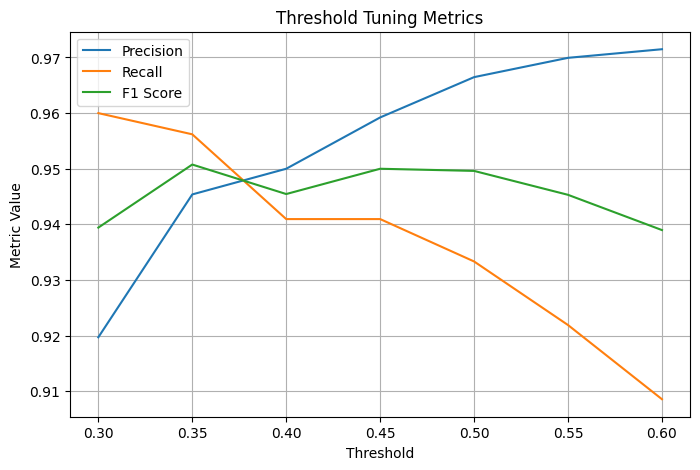

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(df_results['threshold'], df_results['precision'], label='Precision')
plt.plot(df_results['threshold'], df_results['recall'], label='Recall')
plt.plot(df_results['threshold'], df_results['f1_score'], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Threshold Tuning Metrics')
plt.legend()
plt.grid(True)
plt.show()


Seuil optimal choisi : 0.35 

Ce seuil permet d’obtenir un rappel de 95.6 % pour la classe Pneumonia tout en maintenant une précision de 94.5 %, ce qui maximise le F1-score à 0.951. 

il suffit de remplacer y_pred = (y_prob >= 0.5) par y_pred = (y_prob >= 0.35) pour appliquer le nouveau seuil.